In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [313]:
df = pd.read_csv('data/bank-additional-full.csv',sep = ';')

In [314]:
df['education'].replace('unknown', np.nan, inplace=True)
df['pdays'].replace(999, np.nan, inplace=True)

In [315]:
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

fraction of missing values in features:
education    0.042027
pdays        0.963217
dtype: float64


In [316]:
df.dropna(subset=['education'],inplace=True)

In [317]:
for i in df.columns:
    print(i,len(df[i].value_counts()))

age 77
job 12
marital 4
education 7
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1528
campaign 42
pdays 25
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 314
nr.employed 11
y 2


age
count    39457.000000
mean        39.872393
std         10.294725
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64


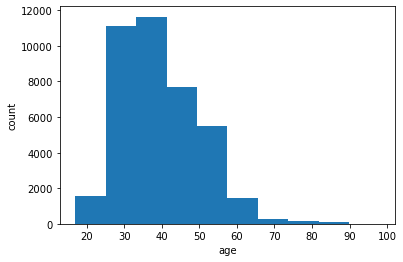

job
admin.           10173
blue-collar       8800
technician        6531
services          3819
management        2801
retired           1622
entrepreneur      1399
self-employed     1392
housemaid         1018
unemployed         995
student            708
unknown            199
Name: job, dtype: int64


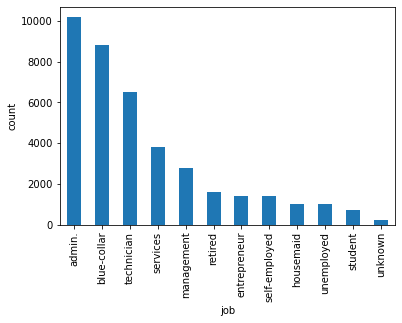

marital
married     23874
single      11087
divorced     4425
unknown        71
Name: marital, dtype: int64


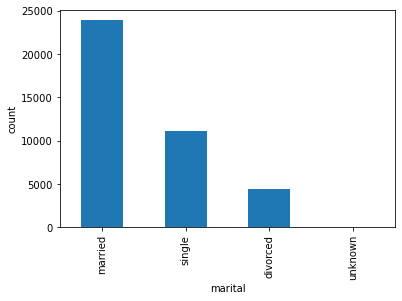

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64


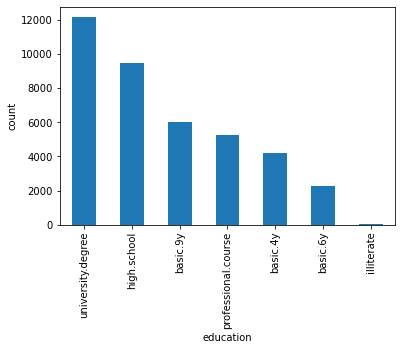

default
no         31405
unknown     8049
yes            3
Name: default, dtype: int64


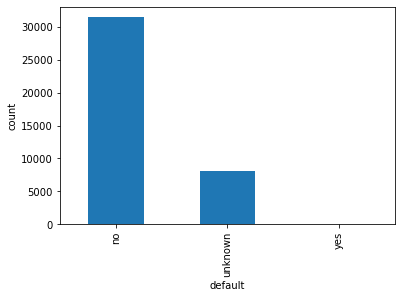

housing
yes        20701
no         17806
unknown      950
Name: housing, dtype: int64


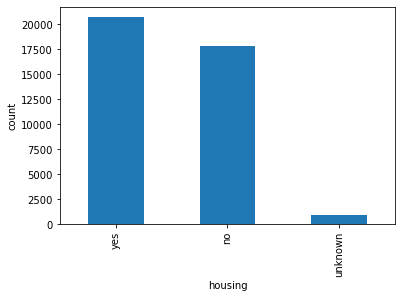

loan
no         32501
yes         6006
unknown      950
Name: loan, dtype: int64


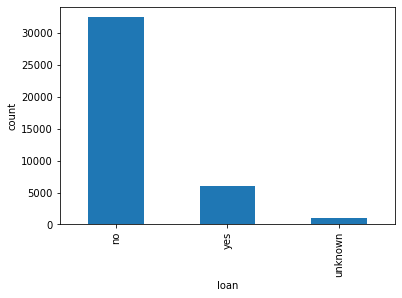

contact
cellular     25127
telephone    14330
Name: contact, dtype: int64


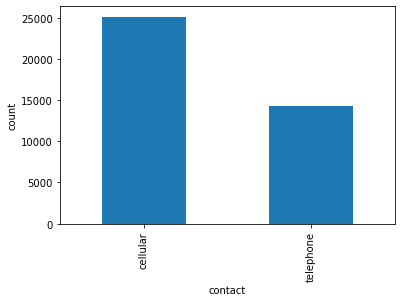

month
may    13238
jul     6800
aug     5983
jun     5063
nov     3983
apr     2503
oct      687
sep      519
mar      513
dec      168
Name: month, dtype: int64


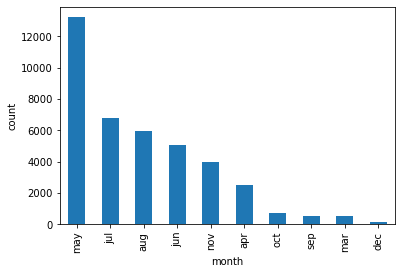

day_of_week
thu    8255
mon    8168
wed    7847
tue    7742
fri    7445
Name: day_of_week, dtype: int64


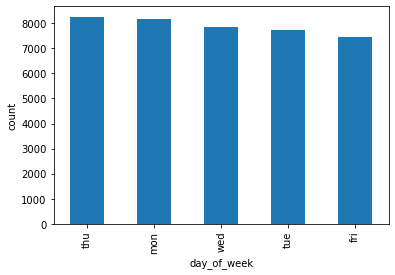

duration
count    39457.000000
mean       258.104899
std        259.900603
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


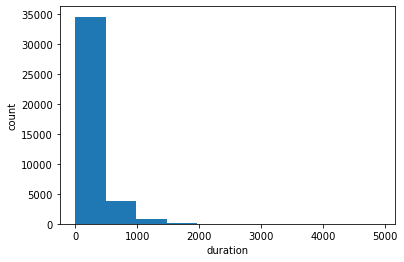

campaign
count    39457.000000
mean         2.566338
std          2.772125
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


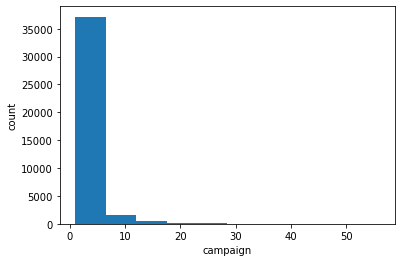

pdays
count    1417.000000
mean        5.955540
std         3.779236
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays, dtype: float64


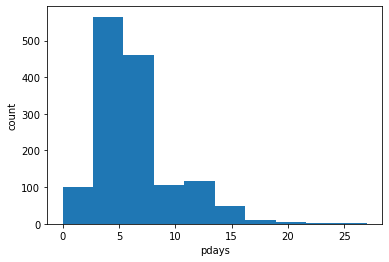

previous
count    39457.000000
mean         0.170616
std          0.488343
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64


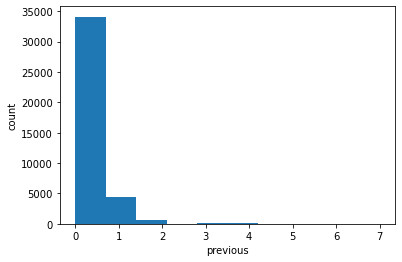

poutcome
nonexistent    34102
failure         4067
success         1288
Name: poutcome, dtype: int64


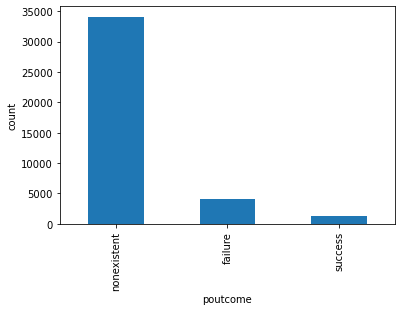

emp.var.rate
count    39457.000000
mean         0.082885
std          1.567387
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64


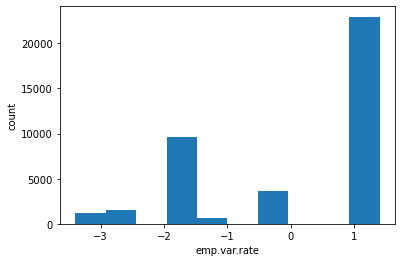

cons.price.idx
count    39457.000000
mean        93.572025
std          0.577244
min         92.201000
25%         93.075000
50%         93.444000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64


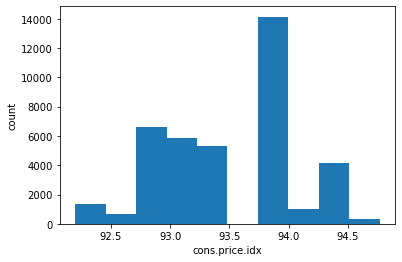

cons.conf.idx
count    39457.00000
mean       -40.53001
std          4.62338
min        -50.80000
25%        -42.70000
50%        -41.80000
75%        -36.40000
max        -26.90000
Name: cons.conf.idx, dtype: float64


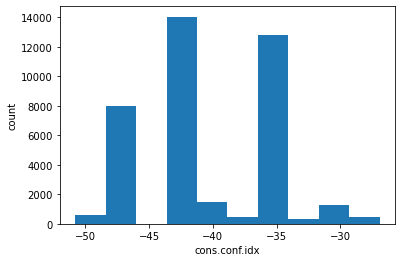

euribor3m
count    39457.000000
mean         3.623493
std          1.730860
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64


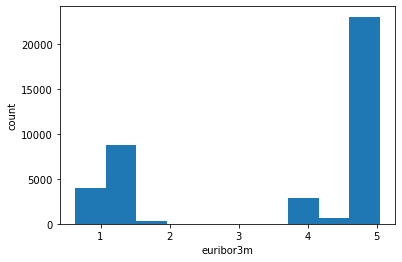

nr.employed
count    39457.000000
mean      5167.364343
std         71.804910
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64


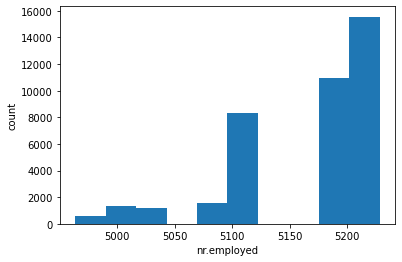

y
no     35068
yes     4389
Name: y, dtype: int64


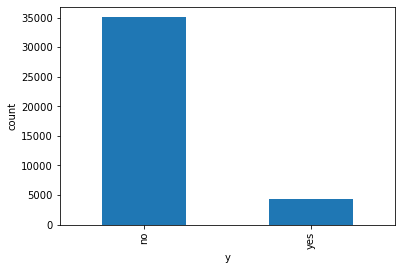

In [318]:
for i in df.columns:
    if len(df[i].value_counts()) < 8 or i in ['month','job','education','day_of_week','contact','poutcome']:
        print(i)
        print(df[i].value_counts()) # value_counts for the categorical variable
        pd.value_counts(df[i]).plot.bar()
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()
    else:
        print(i)
        print(df[i].describe()) # describle for continuous variables
        df[i].plot.hist(bins = 10)
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [319]:
categories = df['y'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['y']==c]['age'],alpha=0.3,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.title('Age distribution among each target class')
plt.ylabel('counts')
plt.xlabel('age')
txt = '''Fig.1 X is age and y is the count of each class in target varibles.
From the plot, we could see that the younger people and the elder people tends to subscribe the campaign'''
plt.figtext(0.5, -0.1, txt, wrap=False, horizontalalignment='center', fontsize=12)
# plt.show()
plt.savefig("figures/age_y.png",bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [320]:
count_matrix = df.groupby(['default', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

y              no       yes
default                    
no       0.873364  0.126636
unknown  0.948814  0.051186
yes      1.000000       NaN


In [308]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of target class')
plt.legend(loc=4)
plt.title('Fraction of target class in each Default condition')
txt = '''Fig.2 X is default condition and y is fraction of target class.
From the plot, if people has credit default, it is impossible for him/her to subscribe a term deposit '''
plt.figtext(0.5, -0.25, txt, wrap=False, horizontalalignment='center', fontsize=12)
# plt.show()
plt.savefig("figures/default_y.png",bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [301]:
count_matrix = df.groupby(['poutcome', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

y                  no       yes
poutcome                       
failure      0.862798  0.137202
nonexistent  0.911970  0.088030
success      0.356366  0.643634


In [309]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of target class')
plt.legend(loc=1)
plt.title('Fraction of target class in each previous outcome condition')
txt = '''Fig.3 X is outcome condition of the previous marketing campaign and y is fraction of target class.
From the plot, if people has subscribe a term deposit in previous campaign, it is more likely for him/her to subscribe again '''
plt.figtext(0.5, -0.3, txt, wrap=False, horizontalalignment='center', fontsize=12)
# plt.show()
plt.savefig("figures/poutcome_y.png",bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [310]:
# categories = df['campaign'].unique()
dataset = [df[df['y']=='yes']['campaign'].values,
           df[df['y']=='no']['campaign'].values]
plt.violinplot(dataset = dataset)
plt.title('Range of contacts number during this campaign')
txt = '''Fig.4 X is outcome condition of the previous marketing campaign and y is fraction of target class.
From the plot, it is clear that clients who subscribed in the campaign has the larger range of contacts number during this campaign'''
plt.figtext(0.5, -0.1, txt, wrap=False, horizontalalignment='center', fontsize=12)
plt.xticks([1,2],['no','yes'])
plt.ylabel('campaign')
# plt.show()
plt.savefig("figures/campaign_y.png",bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

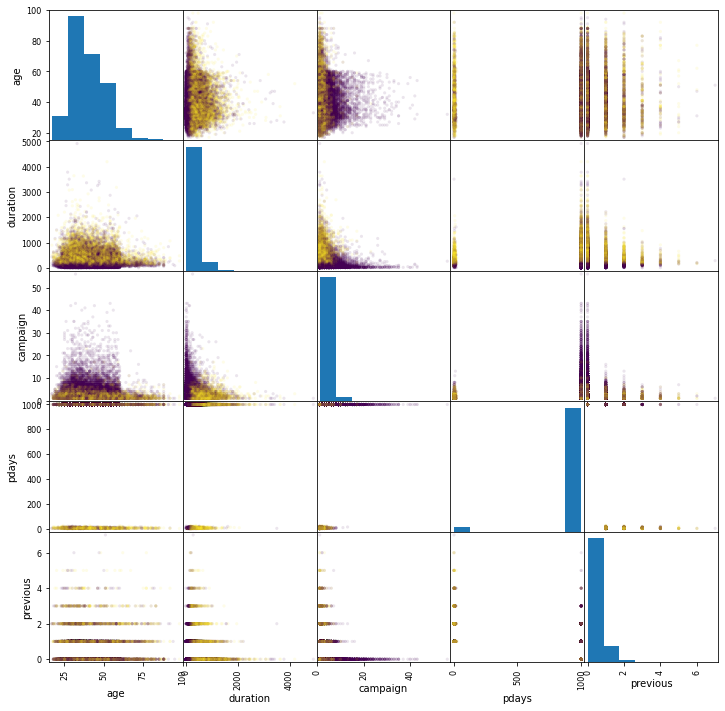

<Figure size 432x288 with 0 Axes>

In [160]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(12, 12), c = pd.get_dummies(df['y']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 8}, s=10, alpha=.1)
plt.show()
plt.savefig("figures/scatter_matrix.png")

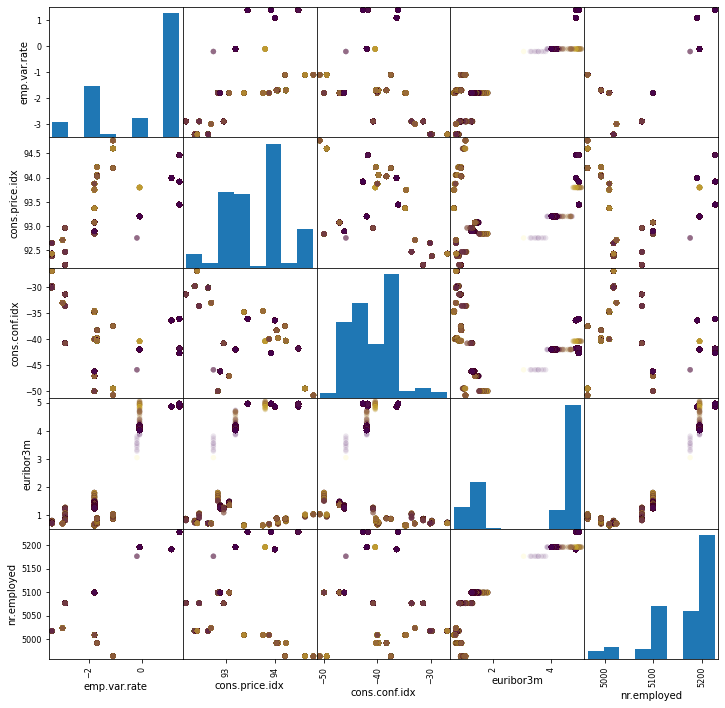

In [162]:
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(12, 12), c = pd.get_dummies(df['y']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 8}, s=30, alpha=.1)
plt.show()
# plt.savefig("figures/scatter_matrix.png")

In [270]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold


y = df['y']
X = df.loc[:, df.columns != 'y']
random_state = 42

# first split to separate out the training set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)

# second split to separate out the validation and test sets
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('train balance:')
    print(y_train.value_counts(normalize=True))
    print('val balance:')
    print(y_val.value_counts(normalize=True))

train balance:
no     0.888761
yes    0.111239
Name: y, dtype: float64
val balance:
no     0.888801
yes    0.111199
Name: y, dtype: float64
train balance:
no     0.888761
yes    0.111239
Name: y, dtype: float64
val balance:
no     0.888801
yes    0.111199
Name: y, dtype: float64
train balance:
no     0.888761
yes    0.111239
Name: y, dtype: float64
val balance:
no     0.888801
yes    0.111199
Name: y, dtype: float64
train balance:
no     0.888761
yes    0.111239
Name: y, dtype: float64
val balance:
no     0.888801
yes    0.111199
Name: y, dtype: float64
train balance:
no     0.888801
yes    0.111199
Name: y, dtype: float64
val balance:
no     0.888642
yes    0.111358
Name: y, dtype: float64


In [271]:
ordinal_ftrs = ['education'] 
ordinal_cats = [['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree']]
onehot_ftrs = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
minmax_ftrs = ['age']
std_ftrs = ['duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)

# the target variable still needs to be preprocessed separately
le = LabelEncoder()
y_train_prep = le.fit_transform(y_train)
y_val_prep = le.transform(y_val)
y_test_prep = le.transform(y_test)

(25252, 20)
(25252, 56)
